# Lending Club - Loan Defaulter Group Case Study

In [1]:
#Importing all the required packages for this case study
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import chardet
plt.style.use('ggplot')
%matplotlib inline

### Reading the source file and before using this data, trying to find the encoding for the same

In [2]:
with open("loan.csv",'rb') as rawdata:
    result=chardet.detect(rawdata.read())
print(result)

{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}


#### From above we see that confidence level is nearly 100% so we will go with the enconding as utf-8

# Data Reading

In [3]:
#Reading given CSV file data
df_loan_data=pd.read_csv("loan.csv",encoding='utf-8')

# Data Understanding

In [4]:
# Checking the number of rows and number of columns in given loan dataframe
df_loan_data.shape

(39717, 111)

In [5]:
# Looking into all columns data for understanding
pd.options.display.max_columns=120
df_loan_data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65            0   
1                  bike    309xx         GA   1.00            0   
2  real estate business    606xx         IL   8.72            0   
3              personel    917xx         CA  20.00            0   
4              Personal    972xx         OR  17.94            0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85               1                     NaN   
1           Apr-99               5                     NaN   
2           Nov-01               2                     NaN   
3           Feb-96               1                    35.0   
4           Jan-96               0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN         3        0      13648     83.70%          9   
1                     NaN         3        0       1687      9.40%          4   
2                     NaN         2        0       2956     98.50%         10   
3                     NaN        10        0       5598        21%         37   
4                     NaN        15        0      27783     53.90%         38   

  initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0                   f       0.00           0.00   5863.155187   
1                   f       0.00           0.00   1008.710000   
2                   f       0.00           0.00   3005.666844   
3                   f       0.00           0.00  12231.890000   
4                   f     524.06         524.06   3513.330000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5833.84          5000.00         863.16     

In [6]:
# Understanding the overall loan data parameters like count, mean, std  etc
df_loan_data.describe()

id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%        8975.000000    280.220000  5.900000e+04     13.400000   
75%       14400.000000    430.780000  8.230000e+04     18.600000   
max       35000.000000   1305.190000  6.000000e+06     29.990000   

        delinq_2yrs  inq_last_6mths  mths_since_last_delinq  \
count  39717.000000    39717.000000            14035.000000   
mean       0.146512        0.869200               35.900962   
std        0.491812        1.070219               22.020060   
min        0.000000        0.000000                0.000000   
25%        0.000000        0.000000               18.000000   
50%        0.000000        1.000000               34.000000   
75%        0.000000        1.000000               52.000000   
max       11.000000        8.000000              120.000000   

       mths_since_last_record      open_acc       pub_rec      revol_bal  \
count             2786.000000  39717.000000  39717.000000   39717.000000   
mean                69.698134      9.294408      0.055065   13382.528086   
std                 43.822529      4.400282      0.237200   15885.016641   
min                  0.000000      2.000000      0.000000       0.000000   
25%                 22.000000      6.000000      0.000000    3703.000000   
50%                 90.000000      9.000000      0.000000    8850.000000   
75%                104.000000     12.000000      0.000000   17058.000000   
max                129.000000     44.000000      4.000000  149588.000000   

          total_acc     out_prncp  out_prncp_inv   total_pymnt  \
count  39717.000000  39717.000000   39717.000000  39717.000000   
mean      22.088828     51.227887      50.989768  12153.596544   
std       11.401709    375.172839     373.824457   9042.040766   
min        2.000000      0.000000       0.000000      0.000000   
25%       13.000000      0.000000       0.000000   5576.930000   
50%       20.000000      0.000000       0.000000   9899.640319   
75%       29.000000      0.000000       0.000000  16534.433040   
max       90.000000   6311.470000    6307.370000  58563.679930   

       total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
count     39717.000000     39717.000000   39717.000000        39717.000000   
mean      11567.149118      9793.348813    2263.663172            1.363015   
std        8942.672613      7065.522127    2608.111964            7.289979   
min           0.000000         0.000000       0.000000            0.000000   
25%        5112.310000      4600.000000     662.180000            0.000000   
50%        9287.150000      8000.000000    1348.910000            0.000000   
75%       15798.810000     13653.260000    2833.400000            0.000000   
max       58563.680000     35000.020000   23563.680000          180.200000   

         recoveries  collection_recovery_fee  last_pymnt_amnt  \
count  39717.000000             39717.000000     39717.000000   
mean      95.221624                12.406112      2678.826162   
std      688.744771               148.671593      4447.136012   
min    

In [7]:
# Info of loan dataframe - rows, columns, dtypes of all columns
df_loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


### Since the above is not giving the entire result so using the verbose attribute to print the same

In [8]:
# Over all information of loan dataframe
df_loan_data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39717 non-null  int64  
 1   member_id                       39717 non-null  int64  
 2   loan_amnt                       39717 non-null  int64  
 3   funded_amnt                     39717 non-null  int64  
 4   funded_amnt_inv                 39717 non-null  float64
 5   term                            39717 non-null  object 
 6   int_rate                        39717 non-null  object 
 7   installment                     39717 non-null  float64
 8   grade                           39717 non-null  object 
 9   sub_grade                       39717 non-null  object 
 10  emp_title                       37258 non-null  object 
 11  emp_length                      38642 non-null  object 
 12  home_ownership                 

# Data Cleaning - na checks, drop duplicates, correcting datatypes

#### checking for null values/missing data in columns and also how much percentage they contribute

In [9]:
# checking loan data contains duplicates or not
print(df_loan_data.shape)
print(df_loan_data.drop_duplicates().shape)
# there is no duplicates in loan csv

(39717, 111)
(39717, 111)


In [10]:
#Checking null value count
print(df_loan_data.isnull().sum())

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64


In [11]:
# Dropping null values in all columns
df_loan_data = df_loan_data.dropna(axis=1,how='all')
df_loan_data.shape

(39717, 57)

In [12]:
# Checking na values percentages in each column, based on that we can either drop those columns or Impute those
round(100*((df_loan_data.isnull().sum())/len(df_loan_data.index)),2).sort_values(ascending=False)

next_pymnt_d                  97.13
mths_since_last_record        92.99
mths_since_last_delinq        64.66
desc                          32.58
emp_title                      6.19
emp_length                     2.71
pub_rec_bankruptcies           1.75
last_pymnt_d                   0.18
chargeoff_within_12_mths       0.14
collections_12_mths_ex_med     0.14
revol_util                     0.13
tax_liens                      0.10
title                          0.03
last_credit_pull_d             0.01
collection_recovery_fee        0.00
acc_now_delinq                 0.00
application_type               0.00
url                            0.00
pymnt_plan                     0.00
loan_status                    0.00
issue_d                        0.00
verification_status            0.00
annual_inc                     0.00
home_ownership                 0.00
delinq_amnt                    0.00
sub_grade                      0.00
grade                          0.00
installment                 

### Finding out those columns which is having more than 30% of data missing and removing those from out main dataframe.

#### We can see from above data that mths_since_last_delinq means number of months since the borrower has not made the payment of emi and it become irrelevant over a period of time .Also we see only 30 individual has made such delinquency in last 1 month and most of them have not made any such delinquency.They cannot be removed for two years, but the further in the past the late payments occurred, the less impact they will have on credit scores and lending decisions.Also we just have 36% individual's data avialable so it could be safe to remove this column.

In [13]:
# Identifying columns which are having null values more than 30%
null_clmn=round(100*((df_loan_data.isnull().sum())/len(df_loan_data.index)),2)>=30.00
null_clmn=null_clmn[null_clmn].index
null_clmn

Index(['desc', 'mths_since_last_delinq', 'mths_since_last_record',
       'next_pymnt_d'],
      dtype='object')

In [14]:
#Drop the above data missing columns
df_loan_data.drop(null_clmn,axis=1,inplace=True)
df_loan_data.shape

(39717, 53)

In [15]:
#Now check the na value percentages
round(100*((df_loan_data.isnull().sum())/len(df_loan_data.index)),2).sort_values(ascending=False)

emp_title                     6.19
emp_length                    2.71
pub_rec_bankruptcies          1.75
last_pymnt_d                  0.18
collections_12_mths_ex_med    0.14
chargeoff_within_12_mths      0.14
revol_util                    0.13
tax_liens                     0.10
title                         0.03
last_credit_pull_d            0.01
annual_inc                    0.00
pymnt_plan                    0.00
url                           0.00
purpose                       0.00
loan_status                   0.00
issue_d                       0.00
verification_status           0.00
sub_grade                     0.00
home_ownership                0.00
addr_state                    0.00
grade                         0.00
installment                   0.00
int_rate                      0.00
term                          0.00
funded_amnt_inv               0.00
funded_amnt                   0.00
loan_amnt                     0.00
member_id                     0.00
zip_code            

#### From above result , it is quite evident that we desc is a free form text field and since no text minning is involved here so we can remove the column rather than fixing it .Also its has more than 30% data missing.

In [16]:
# Checking all columns of loan dataframe
df_loan_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

### Correcting datatypes

In [17]:
# Converting ternm categorical variable to numeric for easy analysis
df_loan_data['term_corrected']=df_loan_data['term'].apply(lambda x:x.replace(" months",""))
df_loan_data['term_corrected']=df_loan_data['term_corrected'].astype('int64')

In [18]:
# Converting int_rate variable to numeric for easy analysis
df_loan_data['int_rate']=df_loan_data['int_rate'].apply(lambda x:x.replace("%",""))
df_loan_data['int_rate']=df_loan_data['int_rate'].astype("float64")

In [19]:
# Converting int_rate variable to numeric for easy analysis
df_loan_data['emp_length']=df_loan_data['emp_length'].astype("str")
df_loan_data['emp_length']=df_loan_data['emp_length'].apply(lambda x:x.replace("years",""))
df_loan_data['emp_length']=df_loan_data['emp_length'].apply(lambda x:x.replace("year",""))
df_loan_data['emp_length']=df_loan_data['emp_length'].apply(lambda x:x.replace("+",""))
df_loan_data['emp_length']=df_loan_data['emp_length'].apply(lambda x:x.replace("< ",""))
df_loan_data['emp_length']=df_loan_data['emp_length'].astype("float64")

In [20]:
# Checking emp_title column
df_loan_data['emp_title'].value_counts()

US Army                            134
Bank of America                    109
IBM                                 66
AT&T                                59
Kaiser Permanente                   56
                                  ... 
Direct Mail Source inc.              1
Roetzel & Andress                    1
Flashback Tees                       1
Dow Jones                            1
Hillman Capital Management Inc.      1
Name: emp_title, Length: 28820, dtype: int64

### Imputing the value of categorical variable emp_title with mode value

In [21]:
# Filling emp_title na values with mode, since it is a categorical column
df_loan_data['emp_title']=df_loan_data['emp_title'].fillna(df_loan_data['emp_title'].mode()[0])

## Checking for percentage null values in rows

In [22]:
round(100*(df_loan_data.isnull().sum(axis=1)/len(df_loan_data.index)),2).sort_values(ascending=False)

## Since the value is very small we donot have to worry about this.

39716    0.01
39671    0.01
39660    0.01
39666    0.01
39667    0.01
         ... 
26435    0.00
26434    0.00
26433    0.00
26432    0.00
0        0.00
Length: 39717, dtype: float64

#### Removing customer behaviour columns like delinq_2yrs,revol_bal.These are such columns which are filled up once the approval process is through.So they are not very useful for our analysis.

In [23]:
# Dropping unrequired columns
df_loan_data.drop('delinq_2yrs',axis=1,inplace=True)

In [24]:
# Dropping unrequired columns
df_loan_data.drop('revol_bal',axis=1,inplace=True)

In [25]:
# Checking shape
df_loan_data.shape

(39717, 52)

## Identifying the target column
### Looking at the data in loan_status column it can be identified that the target value column is loan_status which has 3 main values listed below

In [26]:
# Checking count of each loan status
df_loan_data['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

#### Filtering data basis the target column(loan_status) identified earlier.Since currect status is someone who is still replaying their loan so we cant say it will contribute to default or non default so its better to remove such rows

#### Considering loan_status values Fully Paid & Charged Off only.
#### As per given problem statement 'Current' loan_status not labelled to defaulted
-  <font color='red'> Drop loan_status = 'Current' </font>

In [27]:
# Considering loan data which is not in Current loan status 
df_loan_data=df_loan_data[(df_loan_data['loan_status']!='Current')]

In [28]:
# Checking shape of dataframe after filtering !Current loan status 
df_loan_data.shape

(38577, 52)

In [29]:
# Checking the total values count of each loan status type
df_loan_data['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

### Using loan_status categorical variable, creating target column. Considering Fully paid as '0' and Charged off(default) as '1' for target column values.

In [30]:
# target column holds 1 for Charged Off
# target column holds 0 for Fully Paid
df_loan_data['target']=df_loan_data['loan_status'].apply(lambda x:1 if x=='Charged Off' else 0)

In [31]:
# Reset index for target column
df_loan_data['target'].value_counts()
df_loan_data.reset_index(inplace=True)

In [32]:
# Set target column datatype
df_loan_data['target']=df_loan_data['target'].astype('int64')

In [33]:
# After data cleaning, below are the detailed columns with respective data types for defaulter analysis
df_loan_data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38577 entries, 0 to 38576
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       38577 non-null  int64  
 1   id                          38577 non-null  int64  
 2   member_id                   38577 non-null  int64  
 3   loan_amnt                   38577 non-null  int64  
 4   funded_amnt                 38577 non-null  int64  
 5   funded_amnt_inv             38577 non-null  float64
 6   term                        38577 non-null  object 
 7   int_rate                    38577 non-null  float64
 8   installment                 38577 non-null  float64
 9   grade                       38577 non-null  object 
 10  sub_grade                   38577 non-null  object 
 11  emp_title                   38577 non-null  object 
 12  emp_length                  37544 non-null  float64
 13  home_ownership              385

# Univariate Analysis 
- loan data contains both numerical and categorical variables, so do analysis based on both variables
- By observing Data_Dictionary below variables would be predictors of loan default and see of how it impacts the loan_status(target variable)
- Under Numerical variables, 
    - annual income
    - interest rates
    - loan amounts
    - montly installments
    - emp length
    - term
    - dti
- Under Categorical variables,
    - grade
    - home ownership
    - loan purpose
    - issue date
    - loan verification status

In [34]:
# Describing loan_amnt column
df_loan_data['loan_amnt'].describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

### Based on above data we can divide the loan_amt column into bins have loan amount as 
### L: 0-25%,M:25-50%, H: 50-75%, VH:75-100%.
### The above binning means that loan amount between 500 USD to 5300 USD will constitute to L category and so on.

In [35]:
# Segmenting into different slabs(Binning) to do univariate analysis
slab_range = ['0','0.25','0.50','0.75','1']
slab_names = ['L','M','H','VH']

def slab(df_loan_data,col_name, new_col_name,slab_range,slab_names):
    column_index = df_loan_data.columns.get_loc(col_name) + 1
    df_loan_data.insert(loc=column_index,column=new_col_name,value=pd.qcut(df_loan_data[col_name],slab_range,labels=slab_names))
    return df_loan_data

### Above we have created a UDF so that it can be used for creating bins instead of using the same code again ana agian

In [36]:
# Calling slab function to bin loan_amnt column data and that data would be added under loan_amnt_slab column as below
slab(df_loan_data,'loan_amnt','loan_amnt_slab',slab_range,slab_names)

index       id  member_id  loan_amnt loan_amnt_slab  funded_amnt  \
0          0  1077501    1296599       5000              L         5000   
1          1  1077430    1314167       2500              L         2500   
2          2  1077175    1313524       2400              L         2400   
3          3  1076863    1277178      10000              H        10000   
4          5  1075269    1311441       5000              L         5000   
...      ...      ...        ...        ...            ...          ...   
38572  39712    92187      92174       2500              L         2500   
38573  39713    90665      90607       8500              M         8500   
38574  39714    90395      90390       5000              L         5000   
38575  39715    90376      89243       5000              L         5000   
38576  39716    87023      86999       7500              M         7500   

       funded_amnt_inv        term  int_rate  installment grade sub_grade  \
0               4975.0   36 months     10.65       162.87     B        B2   
1               2500.0   60 months     15.27        59.83     C        C4   
2               2400.0   36 months     15.96        84.33     C        C5   
3              10000.0   36 months     13.49       339.31     C        C1   
4               5000.0   36 months      7.90       156.46     A        A4   
...                ...         ...       ...          ...   ...       ...   
38572           1075.0   36 months      8.07        78.42     A        A4   
38573            875.0   36 months     10.28       275.38     C        C1   
38574           1325.0   36 months      8.07       156.84     A        A4   
38575            650.0   36 months      7.43       155.38     A        A2   
38576            800.0   36 months     13.75       255.43     E        E2   

                        emp_title  emp_length home_ownership  annual_inc  \
0                         US Army        10.0           RENT     24000.0   
1                           Ryder         1.0           RENT     30000.0   
2                         US Army        10.0           RENT     12252.0   
3             AIR RESOURCES BOARD        10.0           RENT     49200.0   
4            Veolia Transportaton         3.0           RENT     36000.0   
...                           ...         ...            ...         ...   
38572             FiSite Research         4.0       MORTGAGE    110000.0   
38573  Squarewave Solutions, Ltd.         3.0           RENT     18000.0   
38574                     US Army         1.0       MORTGAGE    100000.0   
38575                     US Army         1.0       MORTGAGE    200000.0   
38576            Evergreen Center         1.0            OWN     22000.0   

      verification_status issue_d  loan_status pymnt_plan  \
0                Verified  Dec-11   Fully Paid          n   
1         Source Verified  Dec-11  Charged Off          n   
2            Not Verified  Dec-11   Fully Paid          n   
3         Source Verified  Dec-11   Fully Paid          n   
4         Source Verified  Dec-11   Fully Paid          n   
...                   ...     ...          ...        ...   
38572        Not Verified  Jul-07   Fully Paid          n   
38573        Not Verified  Jul-07   Fully Paid          n   
38574        Not Verified  Jul-07   Fully Paid          n   
38575        Not Verified  Jul-07   Fully Paid          n   
38576        Not Verified  Jun-07   Fully Paid          n   

                                                     url             purpose  \
0      https://lendingclub.com/browse/loanDetail.acti...         credit_card   
1      https://lendingclub.com/browse/loanDetail.acti...                 car   
2      https://lendingclub.com/browse/loanDetail.acti...      small_business   
3      https://lendingclub.com/browse/loanDetail.acti...               other   
4      https://lendingclub.com/browse/loanDetail.acti...             wedding   
...                                                  ..

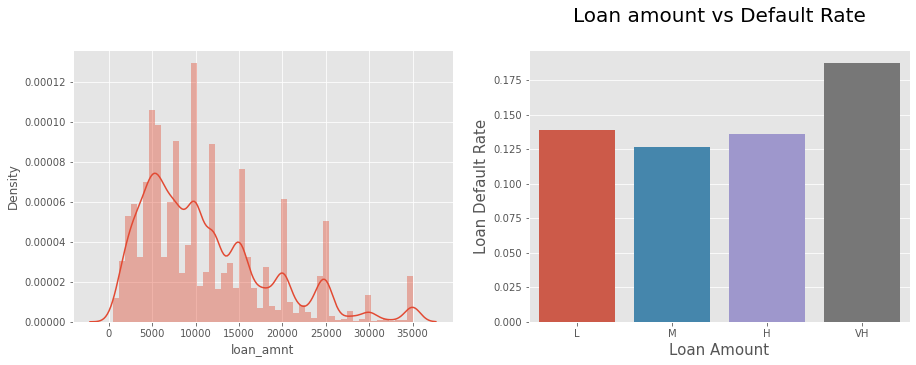

In [37]:
# Ploting 2 graphs here: 1) loan_amnt, 2) loan_amnt_slab against target(charged off loan status)
fig, ax =plt.subplots(1,2, figsize=(15, 5))

sns.distplot(df_loan_data['loan_amnt'], ax=ax[0])

sns.barplot(x='loan_amnt_slab',y='target',data=df_loan_data, ci=None, ax=ax[1])
plt.title("Loan amount vs Default Rate\n",fontdict={'fontsize':'20'})
plt.xlabel("Loan Amount",fontdict={'fontsize':'15'})
plt.ylabel("Loan Default Rate",fontdict={'fontsize':'15'})
plt.show()

#### For the above graph it is evident that,
    - Loan amounts between 5000 to 15000 are high in count.
    - the HIGHER loan amount there are more chances of it being default.

In [38]:
# Describe annual_inc column in loan dataframe
df_loan_data['annual_inc'].describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

### Based on above data we can divide the annual_inc column into bins have annual income as 
### L: 0-25%,M:25-50%, H: 50-75%, VH:75-100%.

In [39]:
# Calling slab function to bin annual_inc and add that data under annual_inc_slab column
slab(df_loan_data,'annual_inc','annual_inc_slab',slab_range,slab_names)

index       id  member_id  loan_amnt loan_amnt_slab  funded_amnt  \
0          0  1077501    1296599       5000              L         5000   
1          1  1077430    1314167       2500              L         2500   
2          2  1077175    1313524       2400              L         2400   
3          3  1076863    1277178      10000              H        10000   
4          5  1075269    1311441       5000              L         5000   
...      ...      ...        ...        ...            ...          ...   
38572  39712    92187      92174       2500              L         2500   
38573  39713    90665      90607       8500              M         8500   
38574  39714    90395      90390       5000              L         5000   
38575  39715    90376      89243       5000              L         5000   
38576  39716    87023      86999       7500              M         7500   

       funded_amnt_inv        term  int_rate  installment grade sub_grade  \
0               4975.0   36 months     10.65       162.87     B        B2   
1               2500.0   60 months     15.27        59.83     C        C4   
2               2400.0   36 months     15.96        84.33     C        C5   
3              10000.0   36 months     13.49       339.31     C        C1   
4               5000.0   36 months      7.90       156.46     A        A4   
...                ...         ...       ...          ...   ...       ...   
38572           1075.0   36 months      8.07        78.42     A        A4   
38573            875.0   36 months     10.28       275.38     C        C1   
38574           1325.0   36 months      8.07       156.84     A        A4   
38575            650.0   36 months      7.43       155.38     A        A2   
38576            800.0   36 months     13.75       255.43     E        E2   

                        emp_title  emp_length home_ownership  annual_inc  \
0                         US Army        10.0           RENT     24000.0   
1                           Ryder         1.0           RENT     30000.0   
2                         US Army        10.0           RENT     12252.0   
3             AIR RESOURCES BOARD        10.0           RENT     49200.0   
4            Veolia Transportaton         3.0           RENT     36000.0   
...                           ...         ...            ...         ...   
38572             FiSite Research         4.0       MORTGAGE    110000.0   
38573  Squarewave Solutions, Ltd.         3.0           RENT     18000.0   
38574                     US Army         1.0       MORTGAGE    100000.0   
38575                     US Army         1.0       MORTGAGE    200000.0   
38576            Evergreen Center         1.0            OWN     22000.0   

      annual_inc_slab verification_status issue_d  loan_status pymnt_plan  \
0                   L            Verified  Dec-11   Fully Paid          n   
1                   L     Source Verified  Dec-11  Charged Off          n   
2                   L        Not Verified  Dec-11   Fully Paid          n   
3                   M     Source Verified  Dec-11   Fully Paid          n   
4                   L     Source Verified  Dec-11   Fully Paid          n   
...               ...                 ...     ...          ...        ...   
38572              VH        Not Verified  Jul-07   Fully Paid          n   
38573               L        Not Verified  Jul-07   Fully Paid          n   
38574              VH        Not Verified  Jul-07   Fully Paid          n   
38575              VH        Not Verified  Jul-07   Fully Paid          n   
38576               L        Not Verified  Jun-07   Fully Paid          n   

                                                     url             purpose  \
0      https://lendingclub.com/browse/loanDetail.acti...         credit_card   
1      https://lendingclub.com/browse/loanDetail.acti...                 car   
2      https://lendingclub.com/browse/loanDetail.acti...      small_business   
3      https://lendingc

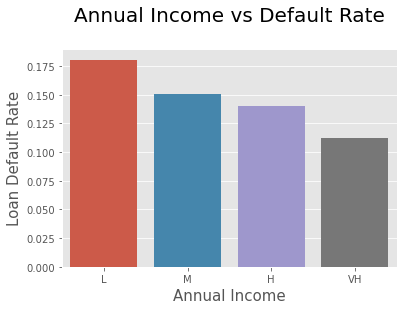

In [40]:
# Ploting graph for: annual_inc against target(charged off loan status)
sns.barplot(x='annual_inc_slab',y='target',data=df_loan_data,ci=None)
plt.title("Annual Income vs Default Rate\n",fontdict={'fontsize':'20'})
plt.xlabel("Annual Income",fontdict={'fontsize':'15'})
plt.ylabel("Loan Default Rate",fontdict={'fontsize':'15'})
plt.show()

#### For the above graph we see that as expected the people with lower income group are more likely to default beacuse with higher income more responsibility comes in and people are concerned about the credit score and all.

In [41]:
# Describing int_rate column in loan dataframe
df_loan_data['int_rate'].describe()

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

In [42]:
# Calling slab function to bin int_rate and add that data into int_rate_slab column
slab(df_loan_data,'int_rate','int_rate_slab',slab_range,slab_names)

index       id  member_id  loan_amnt loan_amnt_slab  funded_amnt  \
0          0  1077501    1296599       5000              L         5000   
1          1  1077430    1314167       2500              L         2500   
2          2  1077175    1313524       2400              L         2400   
3          3  1076863    1277178      10000              H        10000   
4          5  1075269    1311441       5000              L         5000   
...      ...      ...        ...        ...            ...          ...   
38572  39712    92187      92174       2500              L         2500   
38573  39713    90665      90607       8500              M         8500   
38574  39714    90395      90390       5000              L         5000   
38575  39715    90376      89243       5000              L         5000   
38576  39716    87023      86999       7500              M         7500   

       funded_amnt_inv        term  int_rate int_rate_slab  installment grade  \
0               4975.0   36 months     10.65             M       162.87     B   
1               2500.0   60 months     15.27            VH        59.83     C   
2               2400.0   36 months     15.96            VH        84.33     C   
3              10000.0   36 months     13.49             H       339.31     C   
4               5000.0   36 months      7.90             L       156.46     A   
...                ...         ...       ...           ...          ...   ...   
38572           1075.0   36 months      8.07             L        78.42     A   
38573            875.0   36 months     10.28             M       275.38     C   
38574           1325.0   36 months      8.07             L       156.84     A   
38575            650.0   36 months      7.43             L       155.38     A   
38576            800.0   36 months     13.75             H       255.43     E   

      sub_grade                   emp_title  emp_length home_ownership  \
0            B2                     US Army        10.0           RENT   
1            C4                       Ryder         1.0           RENT   
2            C5                     US Army        10.0           RENT   
3            C1         AIR RESOURCES BOARD        10.0           RENT   
4            A4        Veolia Transportaton         3.0           RENT   
...         ...                         ...         ...            ...   
38572        A4             FiSite Research         4.0       MORTGAGE   
38573        C1  Squarewave Solutions, Ltd.         3.0           RENT   
38574        A4                     US Army         1.0       MORTGAGE   
38575        A2                     US Army         1.0       MORTGAGE   
38576        E2            Evergreen Center         1.0            OWN   

       annual_inc annual_inc_slab verification_status issue_d  loan_status  \
0         24000.0               L            Verified  Dec-11   Fully Paid   
1         30000.0               L     Source Verified  Dec-11  Charged Off   
2         12252.0               L        Not Verified  Dec-11   Fully Paid   
3         49200.0               M     Source Verified  Dec-11   Fully Paid   
4         36000.0               L     Source Verified  Dec-11   Fully Paid   
...           ...             ...                 ...     ...          ...   
38572    110000.0              VH        Not Verified  Jul-07   Fully Paid   
38573     18000.0               L        Not Verified  Jul-07   Fully Paid   
38574    100000.0              VH        Not Verified  Jul-07   Fully Paid   
38575    200000.0              VH        Not Verified  Jul-07   Fully Paid   
38576     22000.0               L        Not Verified  Jun-07   Fully Paid   

      pymnt_plan                                                url  \
0              n  https://lendingclub.com/browse/loanDetail.acti...   
1              n  https://lendingclub.com/browse/loanDetail.acti...   
2              n  https://lendingclub.com/browse/loanDetail.acti...   
3              n  https

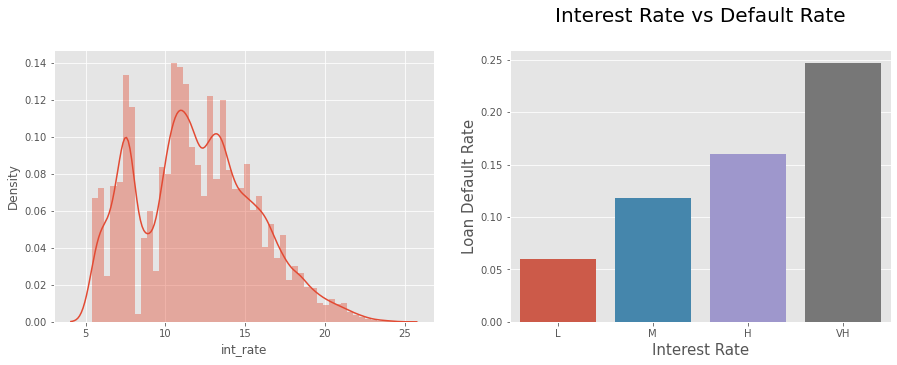

In [43]:
# Ploting 2 graphs here: 1) int_rate, 2) int_rate_slab against target(charged off loan status)
fig, ax =plt.subplots(1,2, figsize=(15, 5))

sns.distplot(df_loan_data['int_rate'], ax=ax[0])

sns.barplot(x='int_rate_slab',y='target',data=df_loan_data,ci=None, ax=ax[1])
plt.title("Interest Rate vs Default Rate\n",fontdict={'fontsize':'20'})
plt.xlabel("Interest Rate",fontdict={'fontsize':'15'})
plt.ylabel("Loan Default Rate",fontdict={'fontsize':'15'})
plt.show()

#### For the above graph it is evident that HIGHER the interest rate there are more chances of it being default.

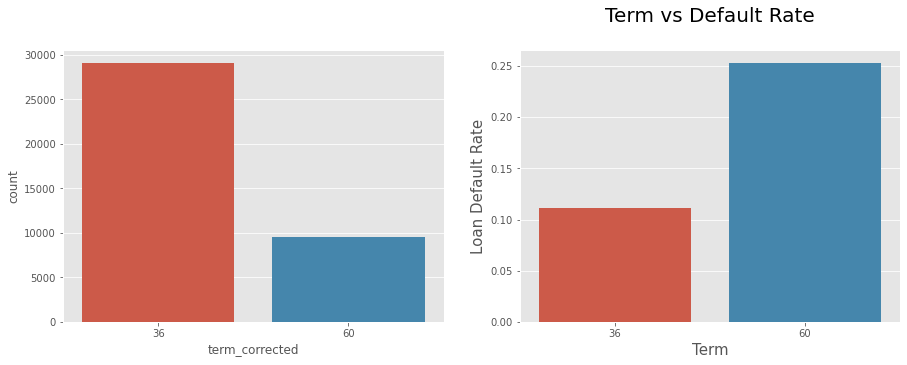

In [44]:
# Ploting 2 graphs here: 1) term_corrected, 2) term_corrected against target(charged off loan status)
fig, ax =plt.subplots(1,2, figsize=(15, 5))

sns.countplot(df_loan_data['term_corrected'], ax=ax[0])

sns.barplot(x='term_corrected',y='target',data=df_loan_data,ci=None, ax=ax[1])
plt.title("Term vs Default Rate\n",fontdict={'fontsize':'20'})
plt.xlabel("Term",fontdict={'fontsize':'15'})
plt.ylabel("Loan Default Rate",fontdict={'fontsize':'15'})
plt.show()

#### For the above graph it is evident that HIGHER is the value of number of payment there are more chances of it being default.

In [45]:
# Describing installment column in loan dataframe
df_loan_data['installment'].describe()

count    38577.000000
mean       322.466318
std        208.639215
min         15.690000
25%        165.740000
50%        277.860000
75%        425.550000
max       1305.190000
Name: installment, dtype: float64

In [46]:
# Calling slab function to bin installment and add that data in installment_slab column
slab(df_loan_data,'installment','installment_slab',slab_range,slab_names)

index       id  member_id  loan_amnt loan_amnt_slab  funded_amnt  \
0          0  1077501    1296599       5000              L         5000   
1          1  1077430    1314167       2500              L         2500   
2          2  1077175    1313524       2400              L         2400   
3          3  1076863    1277178      10000              H        10000   
4          5  1075269    1311441       5000              L         5000   
...      ...      ...        ...        ...            ...          ...   
38572  39712    92187      92174       2500              L         2500   
38573  39713    90665      90607       8500              M         8500   
38574  39714    90395      90390       5000              L         5000   
38575  39715    90376      89243       5000              L         5000   
38576  39716    87023      86999       7500              M         7500   

       funded_amnt_inv        term  int_rate int_rate_slab  installment  \
0               4975.0   36 months     10.65             M       162.87   
1               2500.0   60 months     15.27            VH        59.83   
2               2400.0   36 months     15.96            VH        84.33   
3              10000.0   36 months     13.49             H       339.31   
4               5000.0   36 months      7.90             L       156.46   
...                ...         ...       ...           ...          ...   
38572           1075.0   36 months      8.07             L        78.42   
38573            875.0   36 months     10.28             M       275.38   
38574           1325.0   36 months      8.07             L       156.84   
38575            650.0   36 months      7.43             L       155.38   
38576            800.0   36 months     13.75             H       255.43   

      installment_slab grade sub_grade                   emp_title  \
0                    L     B        B2                     US Army   
1                    L     C        C4                       Ryder   
2                    L     C        C5                     US Army   
3                    H     C        C1         AIR RESOURCES BOARD   
4                    L     A        A4        Veolia Transportaton   
...                ...   ...       ...                         ...   
38572                L     A        A4             FiSite Research   
38573                M     C        C1  Squarewave Solutions, Ltd.   
38574                L     A        A4                     US Army   
38575                L     A        A2                     US Army   
38576                M     E        E2            Evergreen Center   

       emp_length home_ownership  annual_inc annual_inc_slab  \
0            10.0           RENT     24000.0               L   
1             1.0           RENT     30000.0               L   
2            10.0           RENT     12252.0               L   
3            10.0           RENT     49200.0               M   
4             3.0           RENT     36000.0               L   
...           ...            ...         ...             ...   
38572         4.0       MORTGAGE    110000.0              VH   
38573         3.0           RENT     18000.0               L   
38574         1.0       MORTGAGE    100000.0              VH   
38575         1.0       MORTGAGE    200000.0              VH   
38576         1.0            OWN     22000.0               L   

      verification_status issue_d  loan_status pymnt_plan  \
0                Verified  Dec-11   Fully Paid          n   
1         Source Verified  Dec-11  Charged Off          n   
2            Not Verified  Dec-11   Fully Paid          n   
3         Source Verified  Dec-11   Fully Paid          n   
4         Source Verified  Dec-11   Fully Paid          n   
...                   ...     ...          ...        ...   
38572        Not Verified  Jul-07   Fully Paid          n   
38573        Not Verified  Jul-07   Fully Paid          n   
38574        Not Verified  Jul-07   Fully Paid

<AxesSubplot:xlabel='installment', ylabel='Density'>

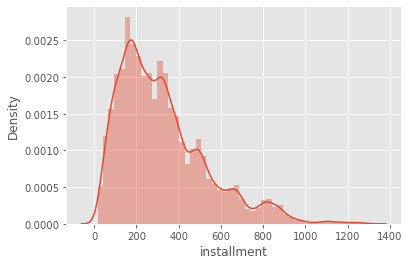

In [47]:
# Ploting installment graph
sns.distplot(df_loan_data['installment'])

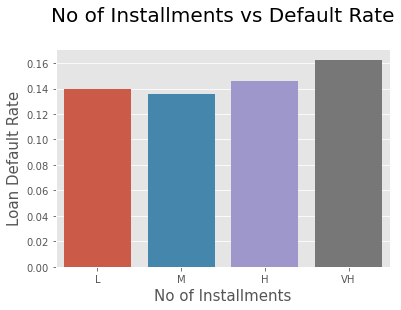

In [48]:
# Ploting graph for installment_slab against target(charged off loan status)
sns.barplot(x='installment_slab',y='target',data=df_loan_data,ci=None)
plt.title("No of Installments vs Default Rate\n",fontdict={'fontsize':'20'})
plt.xlabel("No of Installments",fontdict={'fontsize':'15'})
plt.ylabel("Loan Default Rate",fontdict={'fontsize':'15'})
plt.show()

#### For the above 2 graphs it is evident that,
    - Most of the loans accpted with installment counts below 400 and loans accepting more than 1000 installments are few. 
    - HIGHER is the number of installments there are more chances of it being default.

In [49]:
# Calling slab function to bin dti data and add that data into dti_slab column
slab(df_loan_data,'dti','dti_slab', slab_range,slab_names)

index       id  member_id  loan_amnt loan_amnt_slab  funded_amnt  \
0          0  1077501    1296599       5000              L         5000   
1          1  1077430    1314167       2500              L         2500   
2          2  1077175    1313524       2400              L         2400   
3          3  1076863    1277178      10000              H        10000   
4          5  1075269    1311441       5000              L         5000   
...      ...      ...        ...        ...            ...          ...   
38572  39712    92187      92174       2500              L         2500   
38573  39713    90665      90607       8500              M         8500   
38574  39714    90395      90390       5000              L         5000   
38575  39715    90376      89243       5000              L         5000   
38576  39716    87023      86999       7500              M         7500   

       funded_amnt_inv        term  int_rate int_rate_slab  installment  \
0               4975.0   36 months     10.65             M       162.87   
1               2500.0   60 months     15.27            VH        59.83   
2               2400.0   36 months     15.96            VH        84.33   
3              10000.0   36 months     13.49             H       339.31   
4               5000.0   36 months      7.90             L       156.46   
...                ...         ...       ...           ...          ...   
38572           1075.0   36 months      8.07             L        78.42   
38573            875.0   36 months     10.28             M       275.38   
38574           1325.0   36 months      8.07             L       156.84   
38575            650.0   36 months      7.43             L       155.38   
38576            800.0   36 months     13.75             H       255.43   

      installment_slab grade sub_grade                   emp_title  \
0                    L     B        B2                     US Army   
1                    L     C        C4                       Ryder   
2                    L     C        C5                     US Army   
3                    H     C        C1         AIR RESOURCES BOARD   
4                    L     A        A4        Veolia Transportaton   
...                ...   ...       ...                         ...   
38572                L     A        A4             FiSite Research   
38573                M     C        C1  Squarewave Solutions, Ltd.   
38574                L     A        A4                     US Army   
38575                L     A        A2                     US Army   
38576                M     E        E2            Evergreen Center   

       emp_length home_ownership  annual_inc annual_inc_slab  \
0            10.0           RENT     24000.0               L   
1             1.0           RENT     30000.0               L   
2            10.0           RENT     12252.0               L   
3            10.0           RENT     49200.0               M   
4             3.0           RENT     36000.0               L   
...           ...            ...         ...             ...   
38572         4.0       MORTGAGE    110000.0              VH   
38573         3.0           RENT     18000.0               L   
38574         1.0       MORTGAGE    100000.0              VH   
38575         1.0       MORTGAGE    200000.0              VH   
38576         1.0            OWN     22000.0               L   

      verification_status issue_d  loan_status pymnt_plan  \
0                Verified  Dec-11   Fully Paid          n   
1         Source Verified  Dec-11  Charged Off          n   
2            Not Verified  Dec-11   Fully Paid          n   
3         Source Verified  Dec-11   Fully Paid          n   
4         Source Verified  Dec-11   Fully Paid          n   
...                   ...     ...          ...        ...   
38572        Not Verified  Jul-07   Fully Paid          n   
38573        Not Verified  Jul-07   Fully Paid          n   
38574        Not Verified  Jul-07   Fully Paid

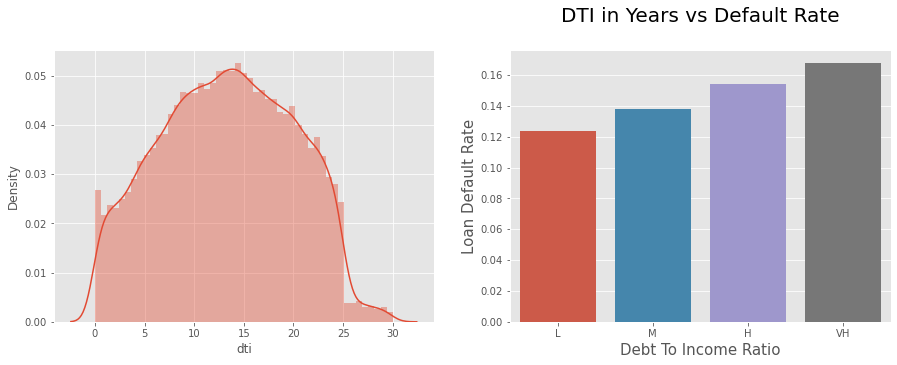

In [50]:
# Ploting 2 graphs here: 1) dti, 2) dti_slab against target(charged off loan status)
fig, ax =plt.subplots(1,2, figsize=(15, 5))

sns.distplot(df_loan_data['dti'], ax=ax[0])

sns.barplot(x='dti_slab',y='target',data=df_loan_data,ci=None, ax=ax[1])
plt.title("DTI in Years vs Default Rate\n",fontdict={'fontsize':'20'})
plt.xlabel("Debt To Income Ratio",fontdict={'fontsize':'15'})
plt.ylabel("Loan Default Rate",fontdict={'fontsize':'15'})
plt.show()

#### The above graph indicates that
    - Annual income distributed symatrically accross median.
    - More the debt compared to income a higher value of DTI and hence more likey to default.

In [51]:
# Checking emp_length data count
df_loan_data['emp_length'].value_counts()

10.0    8488
1.0     7677
2.0     4291
3.0     4012
4.0     3342
5.0     3194
6.0     2168
7.0     1711
8.0     1435
9.0     1226
Name: emp_length, dtype: int64

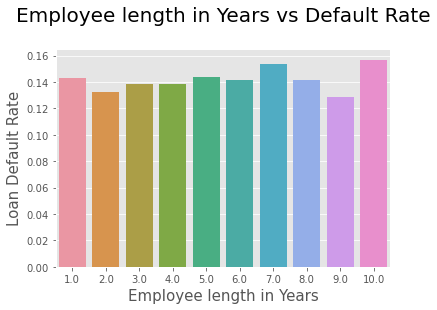

In [52]:
# Ploting graph for emp_length against target(charged off loan status)
sns.barplot(x='emp_length',y='target',data=df_loan_data,ci=None)
plt.title("Employee length in Years vs Default Rate\n",fontdict={'fontsize':'20'})
plt.xlabel("Employee length in Years",fontdict={'fontsize':'15'})
plt.ylabel("Loan Default Rate",fontdict={'fontsize':'15'})
plt.show()

#### For the above graph it is evident that Employee length having quite few changes on loan default rate, hence it is not a grate predictor of default.

In [53]:
# Checking term_corrected value counts
df_loan_data['term_corrected'].value_counts()

36    29096
60     9481
Name: term_corrected, dtype: int64

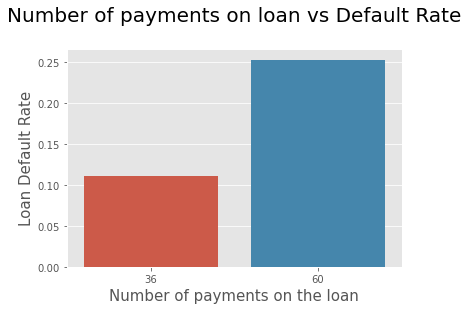

In [54]:
# Ploting graph for term_corrected against target(charged off loan status)
sns.barplot(x='term_corrected',y='target',data=df_loan_data,ci=None)
plt.title("Number of payments on loan vs Default Rate\n",fontdict={'fontsize':'20'})
plt.xlabel("Number of payments on the loan",fontdict={'fontsize':'15'})
plt.ylabel("Loan Default Rate",fontdict={'fontsize':'15'})
plt.show()

#### For the above graph it is evident that HIGHER is the number of payments on loan, there are more chances of it being default.

In [55]:
# Checking grade value counts
df_loan_data['grade'].value_counts()

B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: grade, dtype: int64

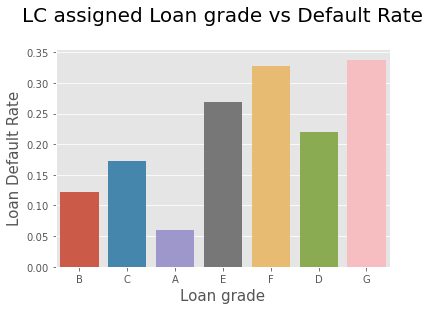

In [56]:
# Ploting graph for grade against target(charged off loan status)
sns.barplot(x='grade',y='target',data=df_loan_data,ci=None)
plt.title("LC assigned Loan grade vs Default Rate\n",fontdict={'fontsize':'20'})
plt.xlabel("Loan grade",fontdict={'fontsize':'15'})
plt.ylabel("Loan Default Rate",fontdict={'fontsize':'15'})
plt.show()

#### For the above graph it is evident that Loan grades G and F having high default rate followed by E,D,C,B and A.The reason might be the high interest rate which is charged for these grdaes compared to other grades and thus becomes more risky. Reference : https://www.lendingclub.com/foliofn/rateDetail.action

In [57]:
# Checking home_ownership data counts
df_loan_data['home_ownership'].value_counts()

RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

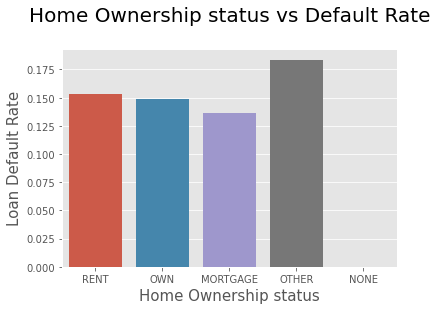

In [58]:
# Ploting graph for home_ownership against target(charged off loan status)
sns.barplot(x='home_ownership',y='target',data=df_loan_data,ci=None)
plt.title("Home Ownership status vs Default Rate\n",fontdict={'fontsize':'20'})
plt.xlabel("Home Ownership status",fontdict={'fontsize':'15'})
plt.ylabel("Loan Default Rate",fontdict={'fontsize':'15'})
plt.show()

#### For the above graph it is evident that people who are not having specific home ownership are more changes to default loans and then followed by Rented ownership.

In [59]:
# Sorting purpose value counts data in ascending order
df_loan_data['purpose'].value_counts().sort_values(ascending=False)

debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
small_business         1754
car                    1499
wedding                 926
medical                 681
moving                  576
vacation                375
house                   367
educational             325
renewable_energy        102
Name: purpose, dtype: int64

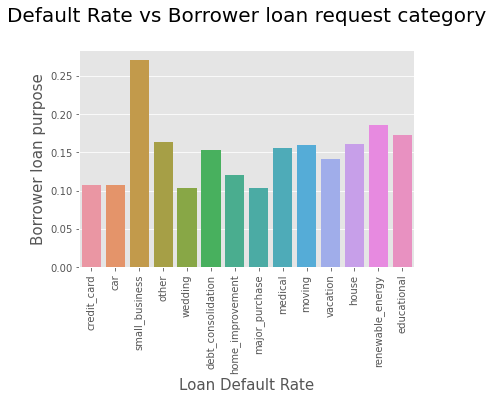

In [60]:
# Ploting graph for purpose against target(charged off loan status)
sns.barplot(x='purpose',y='target',data=df_loan_data,ci=None)
plt.title("Default Rate vs Borrower loan request category\n",fontdict={'fontsize':'20'})
plt.xlabel("Loan Default Rate",fontdict={'fontsize':'15'})
plt.xticks(rotation=90)
plt.ylabel("Borrower loan purpose",fontdict={'fontsize':'15'})
plt.show()

#### For the above graph it is evident that borrowers who are doing small businesses are more to default loans.

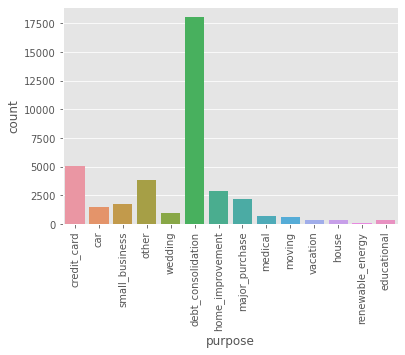

In [61]:
# Ploting graph for purpose
sns.countplot(x='purpose', data=df_loan_data)
plt.xticks(rotation=90)
plt.show()

#### In otherwords, from above graph it is evident that maximum borrowers taking loans for debt consolidation.

In [62]:
# Checking issue date and adding that data to issue_month with first 3 chars
df_loan_data['issue_d'].value_counts()
df_loan_data['issue_month']=df_loan_data['issue_d'].apply(lambda x:x[0:3])
df_loan_data['issue_month']

0        Dec
1        Dec
2        Dec
3        Dec
4        Dec
        ... 
38572    Jul
38573    Jul
38574    Jul
38575    Jul
38576    Jun
Name: issue_month, Length: 38577, dtype: object

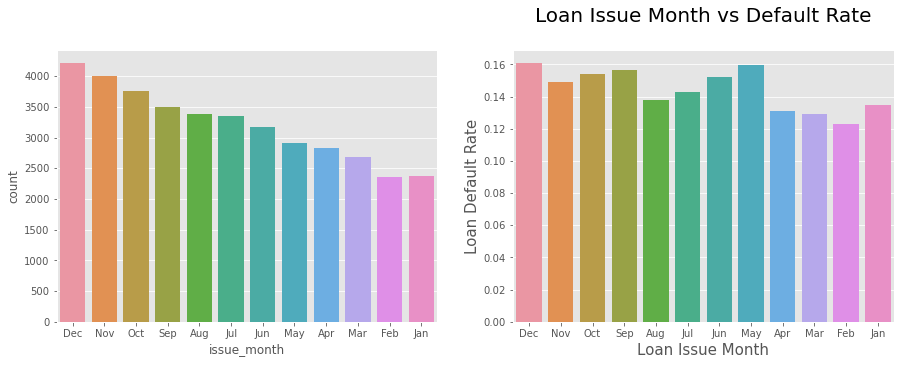

In [63]:
# Ploting 2 graphs here: 1) issue_month, 2) issue_month against target(charged off loan status)
fig, ax =plt.subplots(1,2, figsize=(15, 5))

sns.countplot(df_loan_data['issue_month'], ax=ax[0])

sns.barplot(x='issue_month',y='target',data=df_loan_data,ci=None, ax=ax[1])
plt.title("Loan Issue Month vs Default Rate\n",fontdict={'fontsize':'20'})
plt.xlabel("Loan Issue Month",fontdict={'fontsize':'15'})
plt.ylabel("Loan Default Rate",fontdict={'fontsize':'15'})
plt.show()

#### So from the above graph its evident that we during holiday seasons (towards the end of year) more people take loans and their chances of defaulting increases towards the end of year.

In [64]:
# Checking verification_status column value counts
df_loan_data['verification_status'].value_counts()

Not Verified       16694
Verified           12206
Source Verified     9677
Name: verification_status, dtype: int64

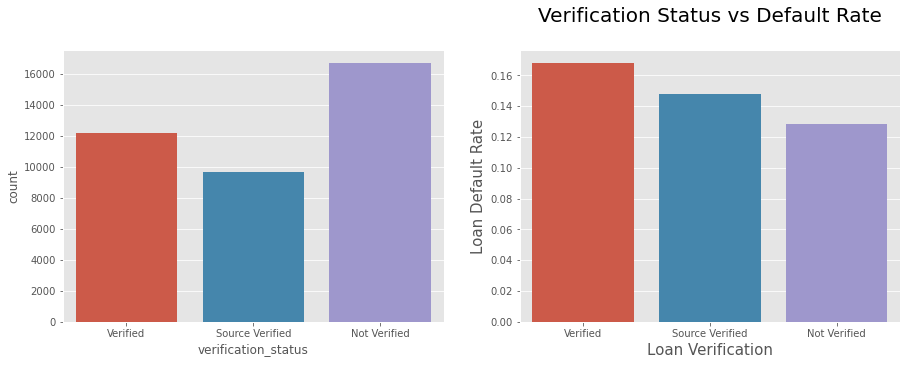

In [65]:
# Ploting 2 graphs here: 1) verification_status, 2) verification_status against target(charged off loan status)
fig, ax =plt.subplots(1,2, figsize=(15, 5))

sns.countplot(df_loan_data['verification_status'], ax=ax[0])

sns.barplot(x='verification_status',y='target',data=df_loan_data,ci=None, ax=ax[1])
plt.title("Verification Status vs Default Rate\n",fontdict={'fontsize':'20'})
plt.xlabel("Loan Verification",fontdict={'fontsize':'15'})
plt.ylabel("Loan Default Rate",fontdict={'fontsize':'15'})
plt.show()

#### From the above graph it is clear that most of the loans are not verified then verified followed by Source verified. Also the one's that are verified have more chances of getting default which clearly indicates that the verification process has some flaw and it needs to be made robust.

# Bivariate Analysis

In [66]:
# Charged off loans for different loan purpose
loan_purpose = pd.DataFrame(df_loan_data.groupby('purpose').id.count().sort_values(ascending=False).reset_index().head(7))
loan_purpose['count']=loan_purpose['id']
loan_purpose.drop('id',axis=1,inplace=True)
loan_purpose

purpose  count
0  debt_consolidation  18055
1         credit_card   5027
2               other   3865
3    home_improvement   2875
4      major_purchase   2150
5      small_business   1754
6                 car   1499

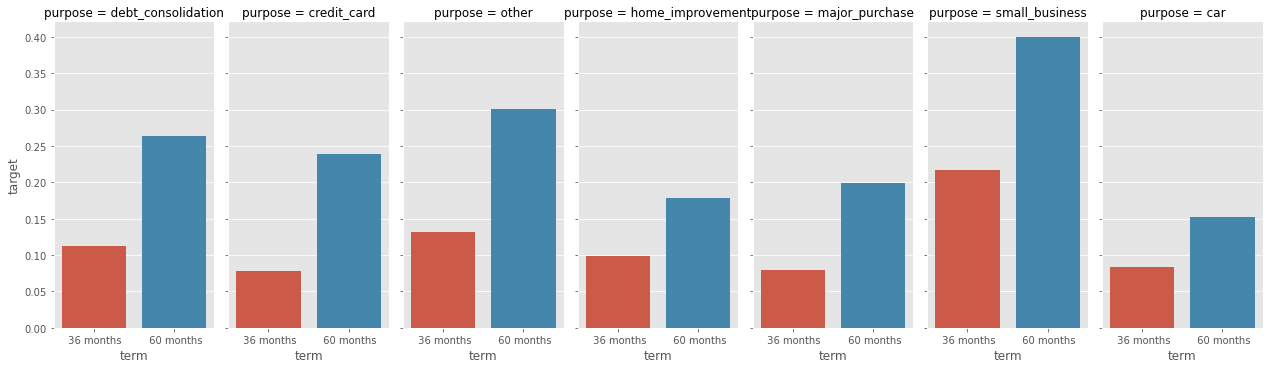

In [67]:
# Ploting graph for term and target(charged off loan status) against purpose
order = loan_purpose['purpose']
sns.catplot(x="term",
            y="target",
            col="purpose",
            col_order=order,
            kind="bar",
            data=df_loan_data,
            aspect=0.5,sharey=True,ci=None)
plt.show()

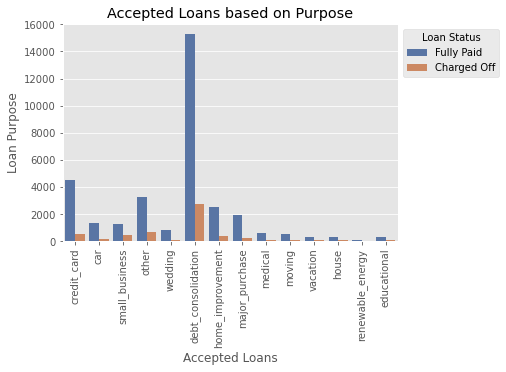

In [68]:
# Ploting graph for purpose against loan_status
sns.countplot(x='purpose', hue ='loan_status', palette='deep', data=df_loan_data)
plt.legend(frameon=True, title='Loan Status', bbox_to_anchor=(1, 1), loc=2)
plt.xlabel('Accepted Loans')
plt.xticks(rotation=90)
plt.ylabel('Loan Purpose')
plt.title("Accepted Loans based on Purpose")
plt.show()

## From the above graphs: 
   - Small business having highest percentage of charged off loans
   - Debt consolidation having high number of charged off loans against charged off value for any other purpose of      loan

In [69]:
# Adding verification_status to ver_sts column
df_loan_data['verification_status'].value_counts()
df_loan_data['ver_sts']=df_loan_data['verification_status']

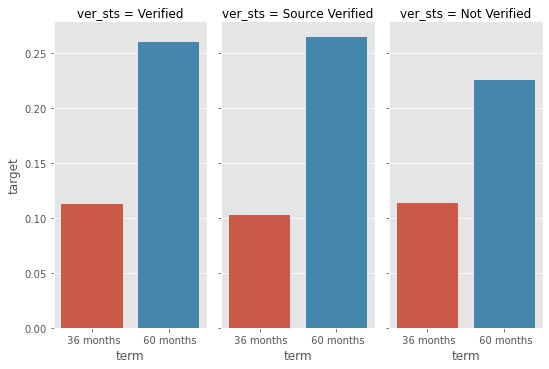

In [70]:
# Plotting graph for term and target against ver_sts
sns.catplot(x="term",
            y="target",
            col="ver_sts",
            kind="bar",
            data=df_loan_data,
            aspect=0.5,sharey=True,legend_out=True,ci=None)
plt.show()

#### The above clearly indicates that whatever is the verifcation status for if the tenure is 60 months it is more likey to be a default.This means that verification status is not correlated to term as whatever the status be if its a long duration its highly likely to be default.

In [71]:
# Sum-up target data by grouping term data 
term_loan = pd.DataFrame(df_loan_data.groupby('term')['target'].sum().reset_index())
term_loan

term  target
0   36 months    3227
1   60 months    2400

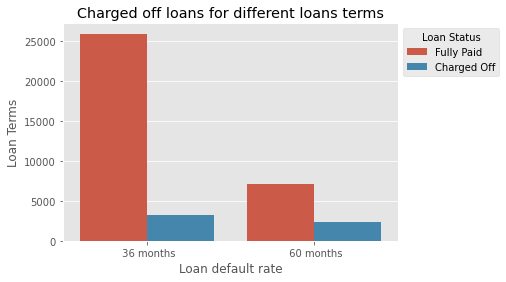

In [72]:
# Plotting graph for term against loan_status
sns.countplot(x='term', hue ='loan_status', data=df_loan_data)
plt.legend(frameon=True, title='Loan Status', bbox_to_anchor=(1, 1), loc=2)
plt.xlabel('Loan default rate')
plt.ylabel('Loan Terms')
plt.title("Charged off loans for different loans terms")
plt.show()

#### Above graph indicates, there are more number of loans with 36 months that becomes charged off compared to term 60 months

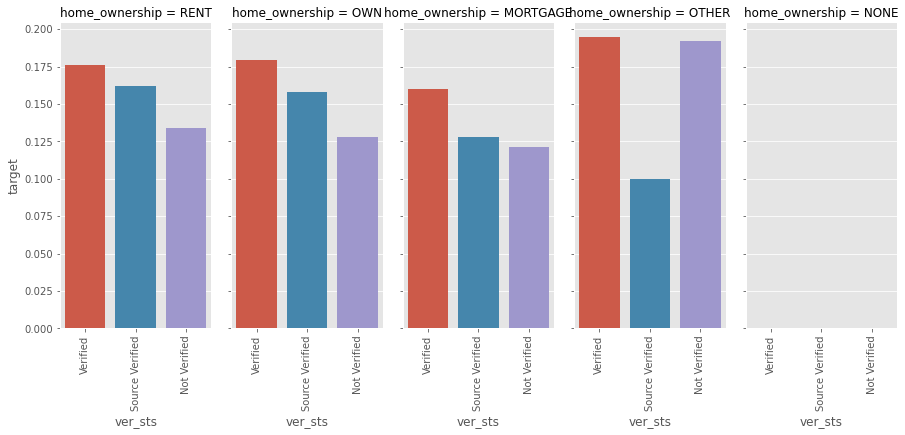

In [73]:
# Plot graph for ver_sts and target against home_ownership
chart=sns.catplot(x="ver_sts",
            y="target",
            col="home_ownership",
            kind="bar",
            data=df_loan_data,
            aspect=0.5,sharey=True,ci=None)
chart.set_xticklabels(rotation=90)
plt.show()

#### The above clearly indicates that, for ownership type OTHER its more likely to be default(charged off).

In [74]:
# Sum-up target data by grouping int_rate_slab data 
loan_int_rate = pd.DataFrame(df_loan_data.groupby('int_rate_slab')['target'].sum().reset_index())
loan_int_rate

int_rate_slab  target
0             L     585
1             M    1123
2             H    1538
3            VH    2381

Text(0.5, 1.0, 'Interest Rates for Loan status')

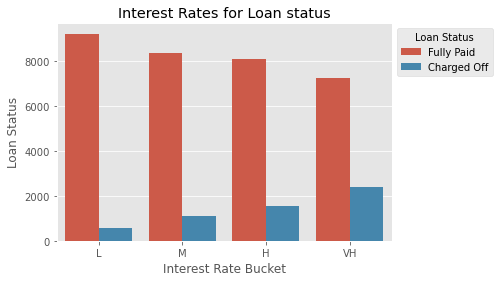

In [75]:
# Plot graph for int_rate_slab against loan_status
sns.countplot(x='int_rate_slab', hue ='loan_status', data=df_loan_data)
plt.legend(frameon=True, title='Loan Status', bbox_to_anchor=(1, 1), loc=2)
plt.xlabel('Interest Rate Bucket')
plt.ylabel('Loan Status')
plt.title("Interest Rates for Loan status")

#### Above graph shows
    - Higher the interest rate bucket, higher the charged off loans when compared against other slab's charged off loan

In [76]:
# Sum-up target data by grouping annual_inc_slab data 
annual_inc_rate = pd.DataFrame(df_loan_data.groupby('annual_inc_slab')['target'].sum().reset_index())
annual_inc_rate

annual_inc_slab  target
0               L    1751
1               M    1442
2               H    1361
3              VH    1073

Text(0.5, 1.0, 'Annual Income for Loan status')

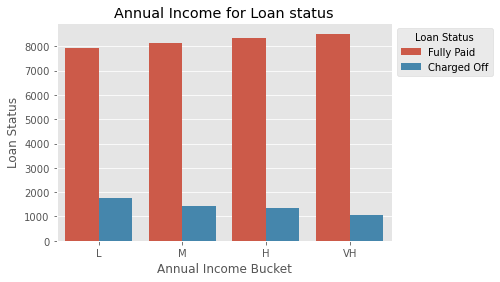

In [77]:
# Plot graph for annual_inc_slab against loan_status
sns.countplot(x='annual_inc_slab', hue ='loan_status', data=df_loan_data)
plt.legend(frameon=True, title='Loan Status', bbox_to_anchor=(1, 1), loc=2)
plt.xlabel('Annual Income Bucket')
plt.ylabel('Loan Status')
plt.title("Annual Income for Loan status")

#### Above graph shows
    - If annual income of loan borrowers increases, the charged off loan decreases

In [78]:
# Creating loan_grade_subgrade dataframe for grade, sub_grade, target and grade&subgrade columns  
loan_grade_subgrade = pd.DataFrame(df_loan_data.groupby(['grade','sub_grade'])['target'].sum().reset_index())
loan_grade_subgrade['grade and subgrade'] = loan_grade_subgrade[['grade', 'sub_grade']].apply(lambda x: ' - '.join(x), axis=1)
loan_grade_subgrade['target'].fillna(0, inplace=True)
loan_grade_subgrade['target'] = loan_grade_subgrade['target'].astype('int64')
loan_grade_subgrade = loan_grade_subgrade.loc[(loan_grade_subgrade['target']!=0)]
loan_grade_subgrade

grade sub_grade  target grade and subgrade
0      A        A1      30             A - A1
1      A        A2      74             A - A2
2      A        A3     103             A - A3
3      A        A4     178             A - A4
4      A        A5     217             A - A5
5      B        B1     171             B - B1
6      B        B2     228             B - B2
7      B        B3     341             B - B3
8      B        B4     329             B - B4
9      B        B5     356             B - B5
10     C        C1     336             C - C1
11     C        C2     321             C - C2
12     C        C3     270             C - C3
13     C        C4     212             C - C4
14     C        C5     208             C - C5
15     D        D1     167             D - D1
16     D        D2     271             D - D2
17     D        D3     256             D - D3
18     D        D4     215             D - D4
19     D        D5     209             D - D5
20     E        E1     198             E - E1
21     E        E2     163             E - E2
22     E        E3     119             E - E3
23     E        E4     126             E - E4
24     E        E5     109             E - E5
25     F        F1      91             F - F1
26     F        F2      70             F - F2
27     F        F3      51             F - F3
28     F        F4      53             F - F4
29     F        F5      54             F - F5
30     G        G1      31             G - G1
31     G        G2      28             G - G2
32     G        G3      19             G - G3
33     G        G4      13             G - G4
34     G        G5      10             G - G5

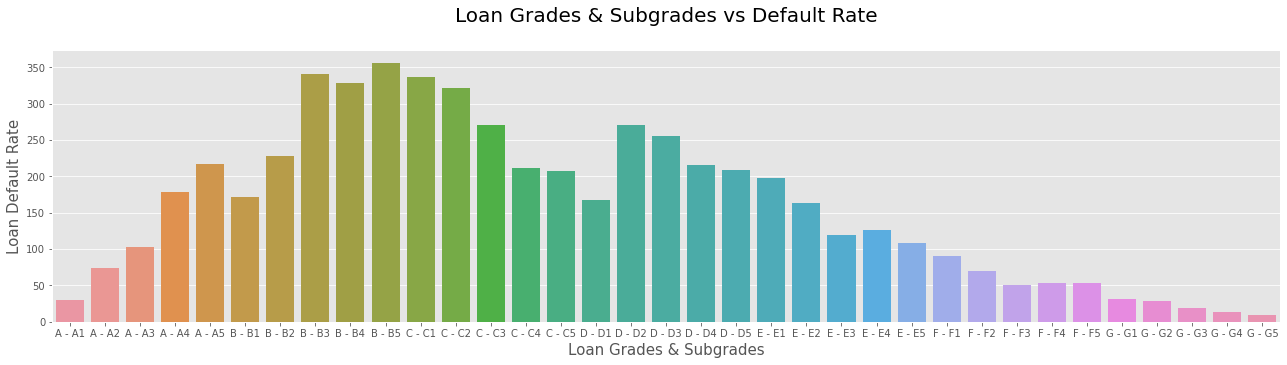

In [79]:
# Plot graph for grade and subgrade against target(charged off loan status)
fig, ax =plt.subplots(1,1, figsize=(22, 5))

sns.barplot(x='grade and subgrade',y='target',data=loan_grade_subgrade, ci=None)
plt.title("Loan Grades & Subgrades vs Default Rate\n",fontdict={'fontsize':'20'})
plt.xlabel("Loan Grades & Subgrades",fontdict={'fontsize':'15'})
plt.ylabel("Loan Default Rate",fontdict={'fontsize':'15'})
plt.show()

####  The above graphs shows below insight

-  The percentage of Charged off loans is higher among the grades of B to D, including subgrades 

### Plotting scatter plots for two numerical vaariables for bivariate analaysis

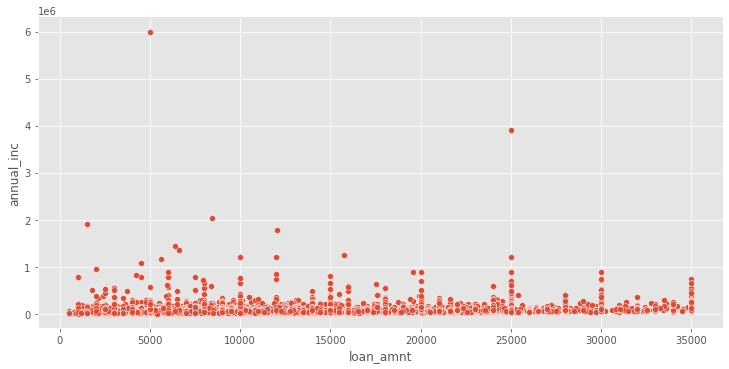

In [80]:
# Checking relation b/w loan amount and annual income 
sns.relplot(x='loan_amnt', y='annual_inc', data=df_loan_data, aspect=2.0)
plt.show()

#### The above graph indicates that higher the annual income less people take loans and for lower income group loan amount is scattered all along

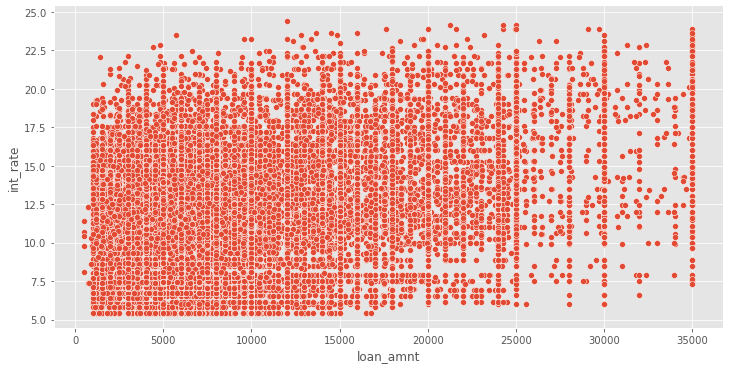

In [81]:
# Checking relation b/w loan amount and interest rate 
sns.relplot(x='loan_amnt', y='int_rate', data=df_loan_data, aspect=2.0)
plt.show()

#### The above graph indicates that more people take loans at mid-range interest rate and as the amount increases fewer people opt for loan even at mid-range interest rate

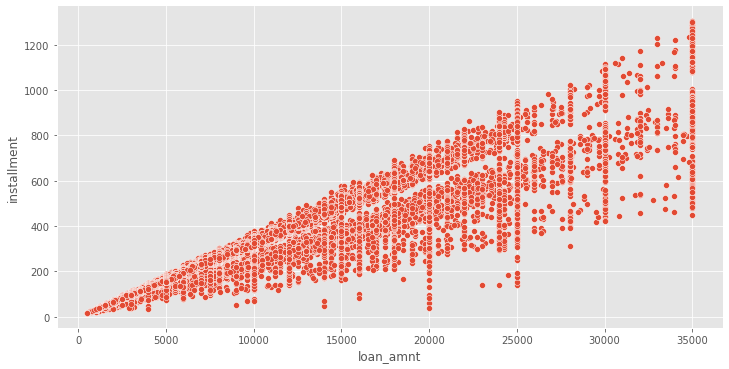

In [82]:
# Checking relation b/w loan amount and instalment 
sns.relplot(x='loan_amnt', y='installment', data=df_loan_data, aspect=2.0)
plt.show()

#### The above graph indicates that as the loan amount increases people tend to increase the no of installments to repay the loan.

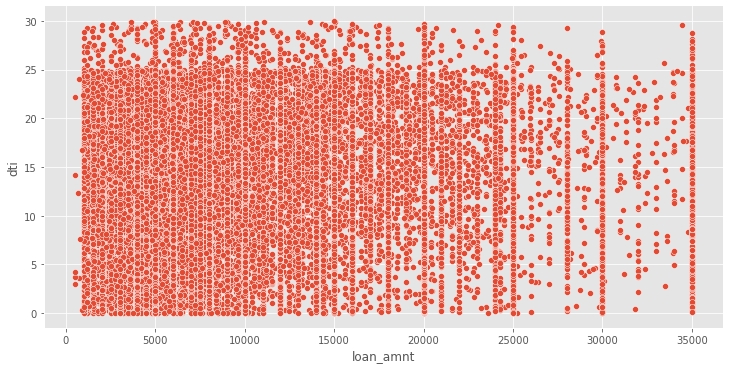

In [83]:
# Checking relation b/w loan amount and debt to income ratio 
sns.relplot(x='loan_amnt', y='dti', data=df_loan_data, aspect=2.0)
plt.show()

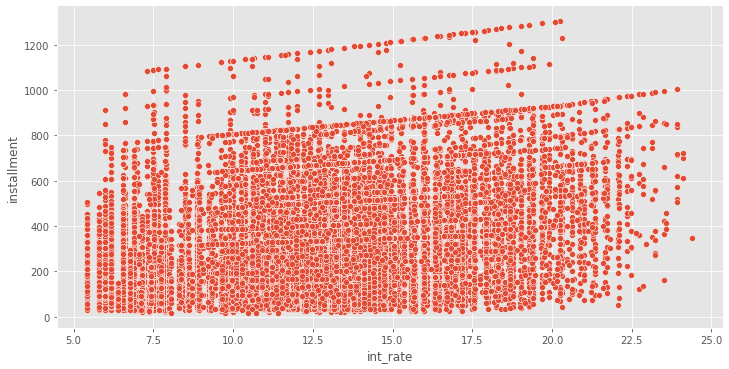

In [84]:
# Checking relation b/w interest rate and instalment 
sns.relplot(x='int_rate', y='installment', data=df_loan_data, aspect=2.0)
plt.show()

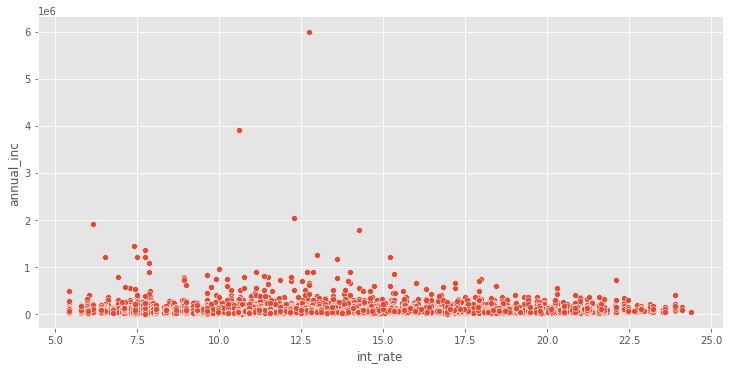

In [85]:
# Checking relation b/w interest rate and annual income 
sns.relplot(x='int_rate', y='annual_inc', data=df_loan_data, aspect=2.0)
plt.show()

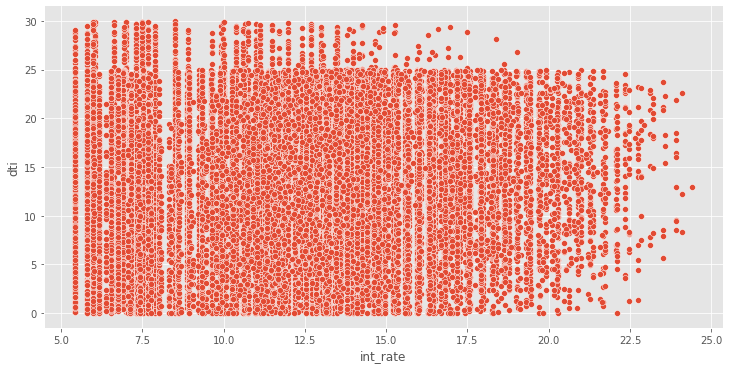

In [86]:
# Checking relation b/w interest rate and debt to income ratio 
sns.relplot(x='int_rate', y='dti', data=df_loan_data, aspect=2.0)
plt.show()

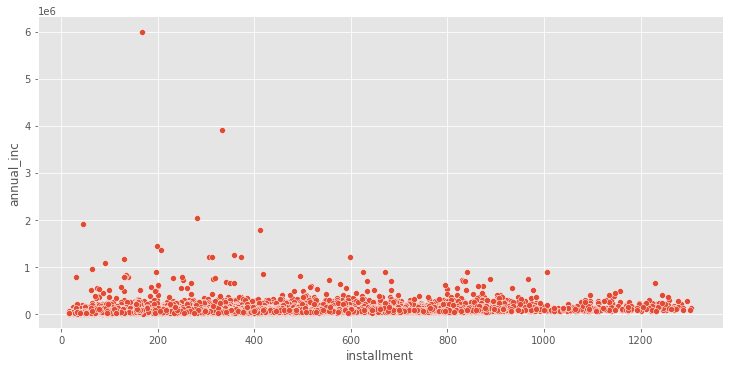

In [87]:
# Checking relation b/w instalment and annual income 
sns.relplot(x='installment', y='annual_inc', data=df_loan_data, aspect=2.0)
plt.show()

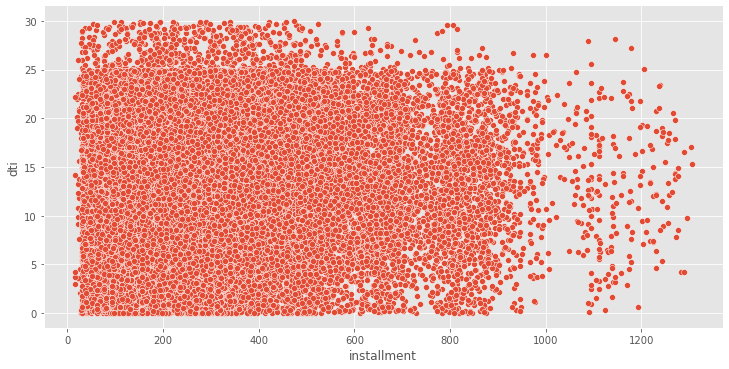

In [88]:
# Checking relation b/w installment and debt to income ratio
sns.relplot(x='installment', y='dti', data=df_loan_data, aspect=2.0)
plt.show()

In [89]:
# Considering annual income, interest rate, loan amount against target (charged off loans)
chargedoff_loans_df = df_loan_data.loc[(df_loan_data['target']==1)]
chargedoff_loans_df_1=chargedoff_loans_df[['annual_inc','int_rate','loan_amnt','target']]

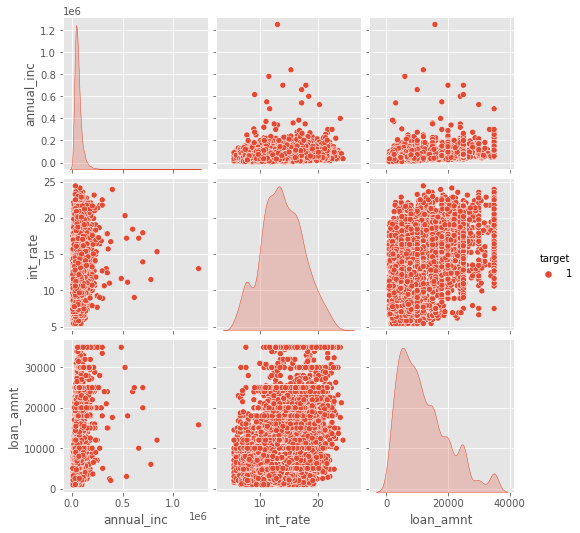

In [90]:
# Plot graph for target column against chargedoff_loans_df
sns.pairplot(data=chargedoff_loans_df_1, hue="target")
plt.show()

#### In the above graph,
    - Annual income, interest rates, loan amount and Compared against target (charged off loan status).
    - Most of the people taking loans in the interest rate between 10 and 20, which is mid range interest rate.
    - When the annual income is low, more people tend to default loans.

In [91]:
# Considering instalment, emp length, term, dti against target (charged off loan status)
chargedoff_loans_df = df_loan_data.loc[(df_loan_data['target']==1)]
chargedoff_loans_df_1=chargedoff_loans_df[['installment','emp_length','term_corrected','dti','target']]

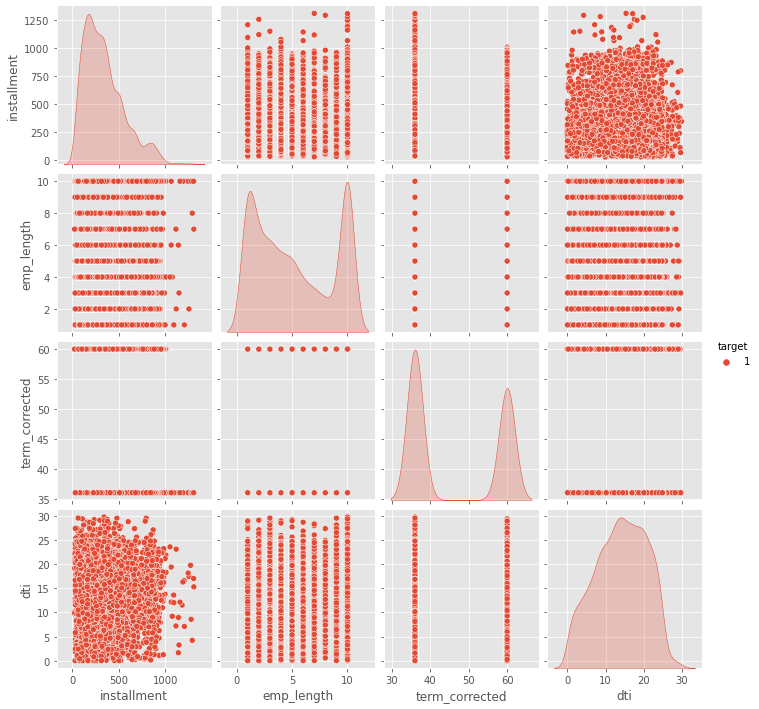

In [92]:
# Plot graph for target against chargedoff_loans_df_1
sns.pairplot(data=chargedoff_loans_df_1, hue="target")
plt.show()

#### From the above graph,
    - Instalments, Employee length, term and dti against target (charged off loan status).
    - Number of instalments ranges between 0 to 1000
    - As Debt to income ratio increases, people start to increase number of instalments against loans and are more likely to default

# Recommdations & Conclusion
#### Annual Income
    - People with lower income group are more likely to default beacuse with higher income more responsibility comes in and people are concerned about the credit score and all.
    - If annual income of loan borrowers increases, the charged off loan decreases
    
#### Loan Amount
    - Loan amounts between 5000 to 15000 are high in count.
    - The HIGHER loan amount there are more chances of it being default.
    - Loan amount increases people tend to increase the no of installments to repay the loan
    
#### Term & Instalments
    - Term duration increase would increase default rate.
    - Most of the loans accpted with installment counts below 400 and loans accepting more than 1000 installments are few.
    - HIGHER is the number of installments there are more chances of it being default.

#### Debt to income
    - Annual income distributed symatrically accross median.
    - More the debt compared to income a higher value of DTI and hence more likey to default.
    
#### Grades
        - Loan grades G and F having high default rate followed by E,D,C,B and A.The reason might be the high interest rate which is charged for these grdaes compared to other grades and thus becomes more risky. 
    - Reference : https://www.lendingclub.com/foliofn/rateDetail.action
    - The percentage of Charged off loans is higher among the grades of B to C followed by C including subgrades
    - Charged Off loans increases from  Grade A to G in both univariate and bivariate analysis. Hence loans of applicants falling into higher grade should be considered for approval.

#### Home Ownership
    - People who are not having specific home ownership are more changes to default loans and then followed by Rented ownership.
    
#### Purpose
    - Borrowers who are doing small businesses are more to default loans
    - Maximum borrowers taking loans for debt consolidation
    
#### Interest Rate
    - Higher the interest rate bucket, higher the charged off loans when compared against other slab's charged off loan
    - People take loans at mid-range interest rate and for lower amount and as the amount increases fewer people opt for loan even at mid-range interest rate.
    
#### Verification Status
    - If the tenure is 60 months it is more likey to be a default.This means that verification status is not correlated to term as whatever the status be if its a long duration its highly likely to be default.